shape: (200, 4)
columns: Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


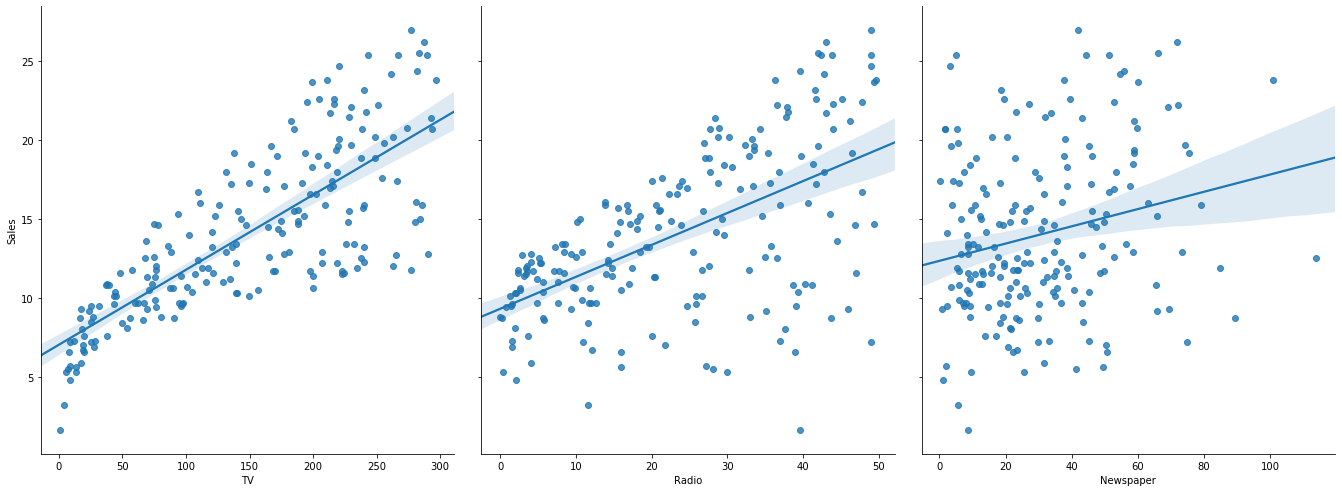

In [15]:
import pandas as pd
import numpy as np
from sklearn import metrics

df = pd.read_csv('Advertising.csv', index_col=0)

print('shape:',df.shape)
print('columns:',df.columns)

import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.9, kind='reg')
plt.show()

In [16]:
feature_columns = ['TV', 'Radio', 'Newspaper']
X = df.loc[:, feature_columns]

y = df.loc[:, 'Sales']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [17]:
from sklearn.linear_model import LinearRegression

lgreg = LinearRegression()

lgreg.fit(X_train, y_train)

print(lgreg.intercept_)
print(lgreg.coef_)
print(list(zip(feature_columns, lgreg.coef_)))

2.8769666223179318
[0.04656457 0.17915812 0.00345046]
[('TV', 0.04656456787415028), ('Radio', 0.17915812245088836), ('Newspaper', 0.0034504647111804347)]


## **Model evaluation methods for regression**

In [1]:
# Mean absolute error - MAE

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

print('MAE', (10+0+20+10)/4 )
print('MAE',metrics.mean_absolute_error(true, pred))

# Mean squared error - MSE
print('MSE', (10**2 + 0**2 + 20**2 + 10**2)/4 )
print('MSE',metrics.mean_squared_error(true, pred))

# Root Mean Squared Error - RMSE
print('RMSE', np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4) )
print('RMSE',np.sqrt(metrics.mean_squared_error(true, pred)))

MAE 10.0


NameError: name 'metrics' is not defined

In [28]:
y_predicted = lgreg.predict(X_test)


print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

RMSE: 1.4046514230328955


In [34]:
print('Accuracy Score:')
print(lgreg.score(X_test, y_test)*100)
print(metrics.r2_score(y_test, y_predicted) * 100)

Accuracy Score:
91.56213613792234
91.56213613792232


In [39]:
## Improving model accuracy

feature_columns = ['TV', 'Radio']
X = df.loc[:, feature_columns]
y = df.loc[:, 'Sales']

lgreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)
lgreg.fit(X_train, y_train)

y_predicted = lgreg.predict(X_test)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

print('Accuracy Score:')
print(lgreg.score(X_test, y_test)*100)
print(metrics.r2_score(y_test, y_predicted) * 100)

# this is better than previous model

RMSE: 1.3879034699382888
Accuracy Score:
91.76214942248907
91.76214942248907
